# Red_Maple_Colored_Bloom Data

In [28]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from scipy import stats

# from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

## Open file and load data

In [30]:
# load csv file
original_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/herb flower data/red maples/Pheno_Red_Maple_Colored_Lvs_NE_USA.csv')

In [31]:
# create a copy of data
df = original_data.copy()


In [32]:
# view the first few entries of the data
df.head()

,Genus,Species,Site_ID,Site_Name,State,Year,Colored_Lvs_Mean_DOY
0,Acer,rubrum,443,PPN_9200010,MI,2011,292.333333
1,Acer,rubrum,443,PPN_9200010,MI,2012,291.400000
2,Acer,rubrum,443,PPN_9200010,MI,2013,285.647059
3,Acer,rubrum,443,PPN_9200010,MI,2014,282.333333
4,Acer,rubrum,443,PPN_9200010,MI,2015,288.888889


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Genus                 512 non-null    object 
 1   Species               512 non-null    object 
 2   Site_ID               512 non-null    int64  
 3   Site_Name             512 non-null    object 
 4   State                 512 non-null    object 
 5   Year                  512 non-null    int64  
 6   Colored_Lvs_Mean_DOY  512 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 28.1+ KB


In [34]:
df['Genus'].unique()

array(['Acer'], dtype=object)

In [35]:
df['Species'].unique()

array(['rubrum'], dtype=object)

In [36]:
site_list = df['Site_Name'].unique()
print('There are',len(site_list),'unique sites')

There are 60 unique sites


## Map each plant name to the associated subset of data

In [37]:
# create hash map to map unique categories to the data points falling into those categories
categorized_data = {}

# for each category group observed in df, map the associated data to the category group
for site in site_list:

  categorized_data.update({site:df[df['Site_Name'] == site].dropna()})


## Visualize and Example

In [38]:
# view data associated with a given Site_Name
example_data = categorized_data.get('Home')

# view data
example_data

,Genus,Species,Site_ID,Site_Name,State,Year,Colored_Lvs_Mean_DOY
52,Acer,rubrum,1904,Home,MN,2017,230.500000
53,Acer,rubrum,1904,Home,MN,2019,265.200000
54,Acer,rubrum,1904,Home,MN,2020,266.166667
55,Acer,rubrum,1904,Home,MN,2021,264.800000
56,Acer,rubrum,1904,Home,MN,2022,271.333333
57,Acer,rubrum,1904,Home,MN,2023,258.937500


## Example Regression

<Axes: xlabel='Year', ylabel='Colored_Lvs_Mean_DOY'>

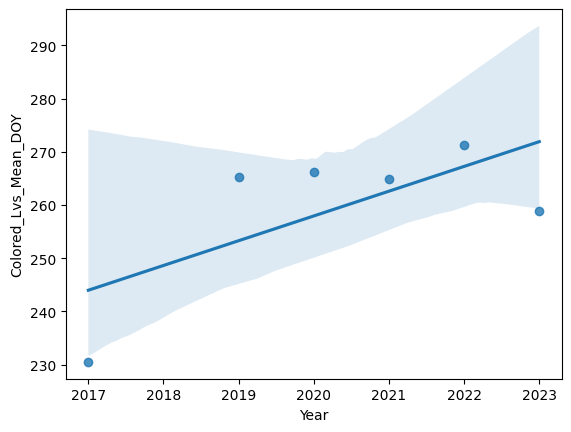

In [39]:
sns.regplot(example_data, x=example_data['Year'], y=example_data['Colored_Lvs_Mean_DOY'])

## Now let's get the correlation coefficient

In [40]:
x=example_data['Year']
y=example_data['Colored_Lvs_Mean_DOY']

round(x.corr(y),4)

0.6821


## Perform the regression and calculate the relevant stats for all sites


In [41]:
#create a list of the various category groups and a separte list of their respective correlations
category_groups = []
pearson_correlations = []
kendall_taus = []
regression_scores = []
slopes=[]
p_values = []
results = []
results2 = []

# loop through all unique catgory groupings
for category in site_list:
  example_data = categorized_data.get(category)
  x=example_data['Year']   #reshape x data to work with sklearn linear model
  y=example_data['Colored_Lvs_Mean_DOY']
  correlation = round(x.corr(y),4)
  tau, p_value = stats.kendalltau(x, y)


  #run the regression via statsmodel
  x = sm.add_constant(x)
  est = sm.OLS(y,x)
  est2 = est.fit()
  if len(x) > 2:
    slopes.append(round(est2.params[1],4))
  else:
    slopes.append(pd.NA)

  p_values.append(round(est2.pvalues[0],4))
  regression_scores.append(round(est2.rsquared,4))

  category_groups.append(category)
  pearson_correlations.append(correlation)
  kendall_taus.append(round(tau,4))


correlation_df = pd.DataFrame({
    'grouping':category_groups,
    'Pearson r': pearson_correlations,
    'Kendall τ': kendall_taus,
    'slope':slopes,
    'R²' : regression_scores,
    'p-value':p_values
})


# Regression Data for Red_Maple_Colored_Bloom

In [42]:
# drop all rows containing NaN values (these seem to usually result from instances where there is only one DOY observation)
correlation_df = correlation_df.dropna()

# view catergories & correlation
print(correlation_df.to_string())
print(len(correlation_df), 'total instances')

                                               grouping  Pearson r  Kendall τ    slope      R²  p-value
0                                           PPN_9200010    -0.2625    -0.0769  -0.4524  0.0689   0.2600
1                                           PPN_9239908     0.6108     0.4667   3.4545  0.3731   0.2140
2                                              backyard     0.0525    -0.0088   0.2566  0.0028   0.9153
3                                       Spicebush_Trail    -0.0893    -0.0182  -0.2917  0.0080   0.6983
4                                                  Home     0.6821     0.2000   4.6543  0.4653   0.1439
5                                    Cary_Institute_PSB     0.0121     0.0000   0.0173  0.0001   0.7994
6                                          Bridge_Trail    -0.0667    -0.1111  -0.1914  0.0045   0.7499
7                Beckman_Lake_Highland_Cedar_Creek_LTER     0.0554     0.3590   0.1951  0.0031   0.9536
8                       PhenoCAM_tower_Cedar_Creek_LTER     0.57

In [43]:
correlation_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pearson r,59.0,-0.047656,0.441322,-0.8994,-0.44355,-0.0393,0.25205,0.8485
Kendall τ,59.0,-0.017637,0.328616,-0.9048,-0.21905,0.0000,0.17310,0.7143
R²,59.0,0.193732,0.215113,0.0001,0.01580,0.1244,0.32605,0.8089
p-value,59.0,0.465773,0.320322,0.0046,0.19890,0.3752,0.78435,0.9768


# Let's reduce our results to groupings that saw a p-value < .1
## Sorted by p-value


In [44]:
significant = correlation_df[correlation_df['p-value']<.10].sort_values('p-value')
print(significant.to_string())
print(len(significant), 'instances in total')

            grouping  Pearson r  Kendall τ   slope      R²  p-value
49         Lily_Pond    -0.8994    -0.9048 -2.3648  0.8089   0.0046
14      First_Meadow    -0.8892    -0.7143 -3.0486  0.7906   0.0061
17      my_back_yard     0.6686     0.4516  7.3377  0.4470   0.0137
21         back_yard    -0.7866    -0.6429 -1.5996  0.6188   0.0146
52       Phudd_Hill_     0.8485     0.7143  1.5566  0.7200   0.0221
15  Big_Meadow_North    -0.6668    -0.5000 -1.7825  0.4446   0.0560
11   Mirror_Lake_NBG    -0.6764    -0.4286 -3.8483  0.4575   0.0854
7 instances in total


### Descriptive Statistics of Instance with p-value < .10:

In [45]:
significant.describe().T

,count,mean,std,min,25%,50%,75%,max
Pearson r,7.0,-0.343043,0.759792,-0.8994,-0.83790,-0.6764,0.00090,0.8485
Kendall τ,7.0,-0.289243,0.619737,-0.9048,-0.67860,-0.5000,0.01150,0.7143
R²,7.0,0.612486,0.164060,0.4446,0.45225,0.6188,0.75530,0.8089
p-value,7.0,0.028929,0.030328,0.0046,0.00990,0.0146,0.03905,0.0854


## Broken Down By Slope

In [46]:
positive_slopes = significant[significant['slope']>0].sort_values('slope')
print(positive_slopes.to_string())

        grouping  Pearson r  Kendall τ   slope     R²  p-value
52   Phudd_Hill_     0.8485     0.7143  1.5566  0.720   0.0221
17  my_back_yard     0.6686     0.4516  7.3377  0.447   0.0137


# Negative Slope:

In [47]:
negative_slopes = significant[significant['slope']<0].sort_values('slope')
print(negative_slopes.to_string())

            grouping  Pearson r  Kendall τ   slope      R²  p-value
11   Mirror_Lake_NBG    -0.6764    -0.4286 -3.8483  0.4575   0.0854
14      First_Meadow    -0.8892    -0.7143 -3.0486  0.7906   0.0061
49         Lily_Pond    -0.8994    -0.9048 -2.3648  0.8089   0.0046
15  Big_Meadow_North    -0.6668    -0.5000 -1.7825  0.4446   0.0560
21         back_yard    -0.7866    -0.6429 -1.5996  0.6188   0.0146


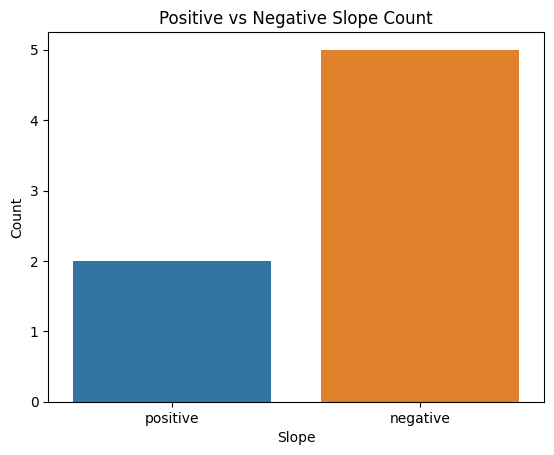

Number of positive slope examples: 2
Number of negative slope examples: 5


In [48]:
# Create a DataFrame
df = pd.DataFrame({
    'Array': ['positive', 'negative'],
    'Length': [len(positive_slopes), len(negative_slopes)]
})

# Create the plot
plot = sns.barplot(x='Array', y='Length', data=df)

# Set the title
plot.set_title('Positive vs Negative Slope Count')

# Set x and y-axis labels
plot.set_xlabel('Slope')
plot.set_ylabel('Count')

plt.show()

print('Number of positive slope examples:',len(positive_slopes))
print('Number of negative slope examples:',len(negative_slopes))

## 7, out of the original 59, groupings showed a statistically significant (p < .10) relationship between year and Breaking_Lvs_Min_DOY
##2 have a positive slope
##5 have a negative slope